In [1]:
from pyConAVL import ConAVL
from pyAVL import AVL
import random
import threading

In [2]:
TXN_G = 0 # get (TXN_G, KEY)
TXN_P = 1 # put (TXN_P, KEY, VAL)
TXN_R = 2 # remove (TXN_R, KEY)
class TXN:
    def __init__(self):
        self._result = None
    def run(self, dtree, dseq):
        """
        run a operation sequence on specific avl tree
        sequence should be in a list of tuples [(),()]
        """
        results = []
        for p in dseq:
            if p[0]==TXN_G:
                results.append(dtree.get(p[1]))
                continue
            if p[0]==TXN_P:
                results.append(dtree.put(p[1], p[2]))
                continue
            if p[0]==TXN_R:
                results.append(dtree.remove(p[1]))
                continue
        self._result = results
    def get_result(self):
        return self._result

In [2]:
# TXN_G = 0 # get (TXN_G, KEY)
# TXN_P = 1 # put (TXN_P, KEY, VAL)
# TXN_R = 2 # remove (TXN_R, KEY)
# def run_txn(dtree, dseq):
#     """
#     run a operation sequence on specific avl tree
#     sequence should be in a list of tuples [(),()]
#     """
#     results = []
#     for p in dseq:
#         if p[0]==TXN_G:
#             results.append(dtree.get(p[1]))
#             continue
#         if p[0]==TXN_P:
#             results.append(dtree.put(p[1], p[2]))
#             continue
#         if p[0]==TXN_R:
#             results.append(dtree.remove(p[1]))
#             continue
#     return results

In [3]:
random_list = random.sample(list(range(50)),k=50)

### Concurrent All Insertion Transactions
#### - conAVL succeeds
#### - seqAVL fails

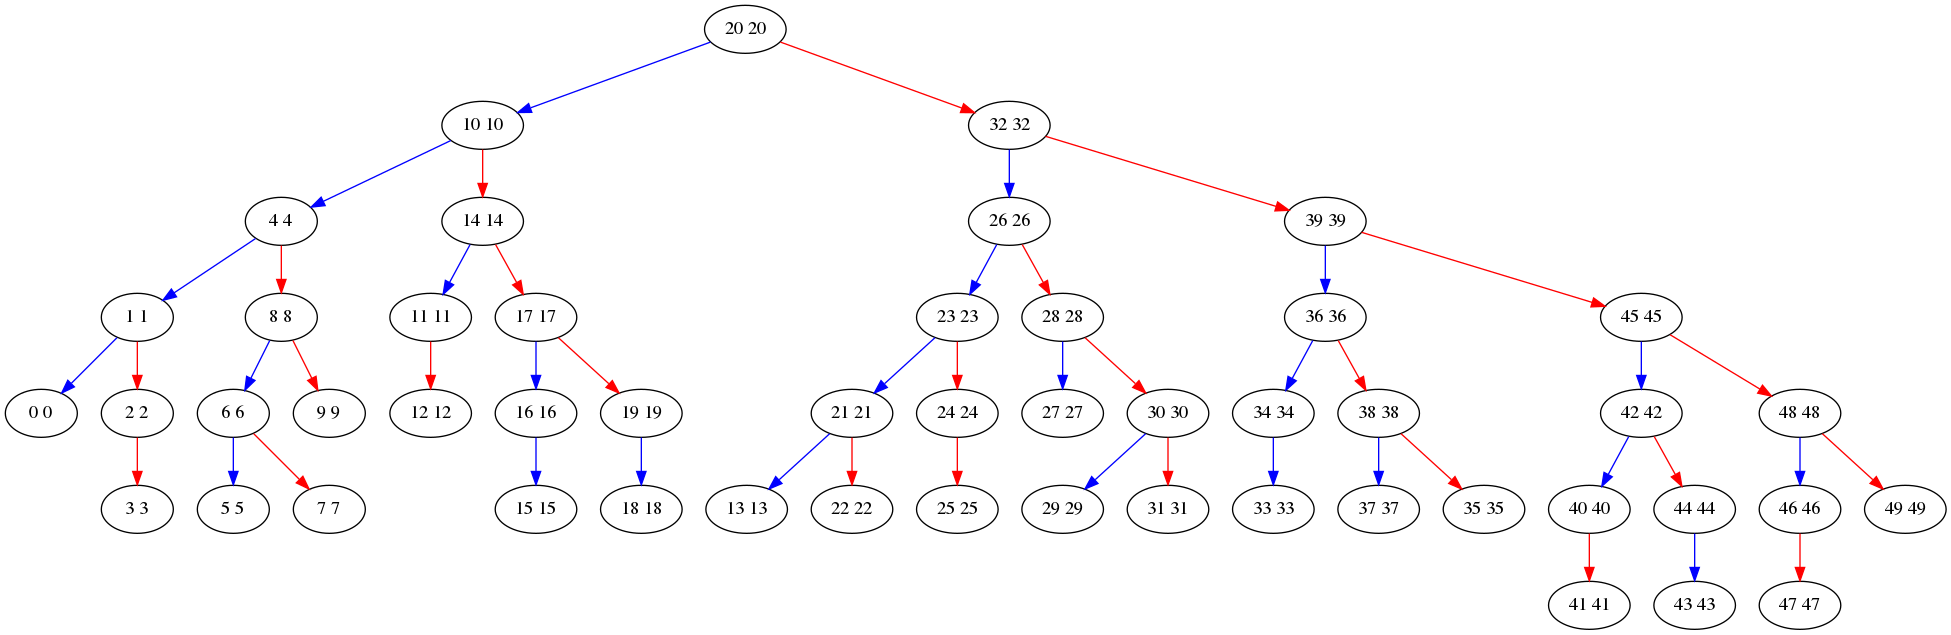

[None, None, None, None, None, None, None, None, None, None]

In [7]:
conTree1 = ConAVL(simulate=True)
conRUN1 = [TXN() for i in range(5)]
conSEQ1 = [[(TXN_P, i, i) for i in random_list[j*10:(j+1)*10]] for j in range(5)]
conTXN1 = [threading.Thread(target=conRUN1[i].run, args=(conTree1, conSEQ1[i])) for i in range(5)]
for i in range(5):
    conTXN1[i].start()
for i in range(5):
    conTXN1[i].join()
conTree1.print()

In [8]:
seqTree1 = AVL(simulate=True)
seqRUN1 = [TXN() for i in range(5)]
seqSEQ1 = [[(TXN_P, i, i) for i in random_list[j*10:(j+1)*10]] for j in range(5)]
seqTXN1 = [threading.Thread(target=seqRUN1[i].run, args=(seqTree1, seqSEQ1[i])) for i in range(5)]
for i in range(5):
    seqTXN1[i].start()
for i in range(5):
    seqTXN1[i].join()
seqTree1.print()

Exception in thread Thread-26:
Traceback (most recent call last):
  File "/home/xiyou/anaconda3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/xiyou/anaconda3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-2-8f1b248b7d29>", line 18, in run
    results.append(dtree.put(p[1], p[2]))
  File "/scratch/home/xiyou/justin/pyConcurrentAVL/pyConcurrentAVL/pyAVL.py", line 21, in put
    self.__rebalance()
  File "/scratch/home/xiyou/justin/pyConcurrentAVL/pyConcurrentAVL/pyAVL.py", line 42, in __rebalance
    self.root = self.__getRoot(self.__autoRotate(unbalanced))
  File "/scratch/home/xiyou/justin/pyConcurrentAVL/pyConcurrentAVL/pyAVL.py", line 380, in __autoRotate
    return self.__rotateRL(dnode)
  File "/scratch/home/xiyou/justin/pyConcurrentAVL/pyConcurrentAVL/pyAVL.py", line 315, in __rotateRL
    k2 = k3.left
AttributeError: 'NoneType' object has no attribute 'left'

Exception in

TypeError: must be str, not int

### Concurrent Mixed Operation Transactions

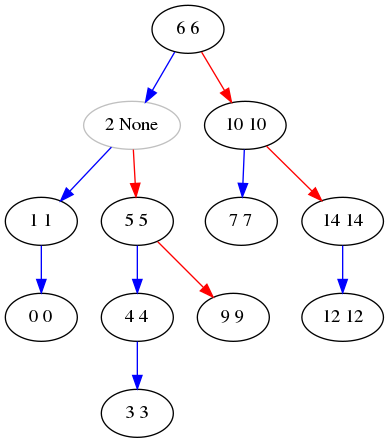

[None, 4, None, None, None, None, None, None]
[None, None, None, None, 2, None, None, None]
[None, 1, None, None, None, None, 1]


In [10]:
conTree1 = ConAVL(simulate=True)
conRUN1 = [TXN() for i in range(3)]
conSEQ1 = [
    [(TXN_P, 4, 4), (TXN_G, 4), (TXN_P, 6, 6), (TXN_P, 9, 9), (TXN_P, 14, 14), (TXN_P, 3, 3), (TXN_G, 9), (TXN_R, 9)],
    [(TXN_P, 8, 8), (TXN_R, 8), (TXN_P, 7, 7), (TXN_P, 2, 2), (TXN_G, 2, 2), (TXN_R, 2, 2), (TXN_P, 5, 5), (TXN_P, 0, 0)],
    [(TXN_P, 1, 1), (TXN_G, 1), (TXN_P, 10, 10), (TXN_P, 15, 15), (TXN_P, 12, 12), (TXN_R, 15, 15), (TXN_G, 1)]
]
conTXN1 = [threading.Thread(target=conRUN1[i].run, args=(conTree1, conSEQ1[i])) for i in range(3)]
for i in range(3):
    conTXN1[i].start()
for i in range(3):
    conTXN1[i].join()
conTree1.print()
for i in range(3):
    print(conRUN1[i].get_result())
# 9, 8, 2, 15 should not appear in the final graph

[None, 4, None, None, None, None, 9, None]
[None, None, None, None, 2, None, None, None]
[None, 1, None, None, None, None, 1]


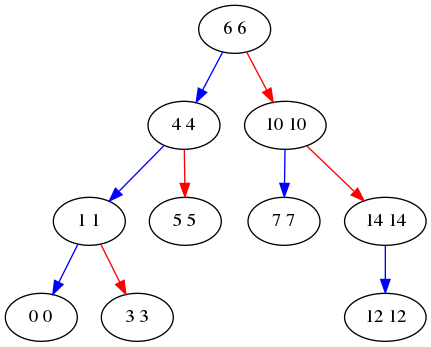

In [18]:
seqTree1 = ConAVL(simulate=False)
seqRUN1 = [TXN() for i in range(3)]
seqSEQ1 = [
    [(TXN_P, 4, 4), (TXN_G, 4), (TXN_P, 6, 6), (TXN_P, 9, 9), (TXN_P, 14, 14), (TXN_P, 3, 3), (TXN_G, 9), (TXN_R, 9)],
    [(TXN_P, 8, 8), (TXN_R, 8), (TXN_P, 7, 7), (TXN_P, 2, 2), (TXN_G, 2, 2), (TXN_R, 2, 2), (TXN_P, 5, 5), (TXN_P, 0, 0)],
    [(TXN_P, 1, 1), (TXN_G, 1), (TXN_P, 10, 10), (TXN_P, 15, 15), (TXN_P, 12, 12), (TXN_R, 15, 15), (TXN_G, 1)]
]
for i in range(3):
    seqRUN1[i].run(seqTree1, seqSEQ1[i])
    print(seqRUN1[i].get_result())
seqTree1.print()